In [60]:
from citipy import citipy
import numpy as np
import random
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

api_key = YOUR_API_KEY


In [74]:
def get_random_cities_weather_info(number_of_cities):
    cities_info = []                                    # Will hold all the cities information
    cities_names = []                                   # Helps us keep track of cities and avoid duplicates
    while (len(cities_names) < num_of_cities):
        # Tells you how far in the process
        if(len(cities_names)%100 == 0):
            print(len(cities_names), "/ 500 completed")
            
        # Getting random latitude and longiutde
        latitude = random.uniform(-82.86, 64.75)
        longitude = random.uniform(-100.11, 147.34)
        city=citipy.nearest_city(latitude, longitude)
        
        # If the city is not a duplicate
        if city not in cities_names:
            query_url = url + "appid=" + api_key + "&q=" + city.city_name + "&units=imperial"
            weather_response = requests.get(query_url)
            city_data = weather_response.json()
            # Only add the city if the request was succesfull 
            try:
                if(city_data["coord"]):
                    cities_info.append(city_data)
                    cities_names.append(city)
                print("City Added: " + city.city_name)
            except:
                print("City was not added: " + city.city_name)
                continue
        # after getting all the data return
    return cities_info

# Uncomment the line below to get new data
# cities_info = get_random_cities_weather_info(500)

0 / 500 completed
City was not added: taolanaro
0 / 500 completed
City Added: faya
City Added: padang
City Added: jamestown
City was not added: tsihombe
City Added: shenxian
City Added: baracoa
City Added: labuhan
City Added: saint-felicien
City Added: wewak
City Added: airai
City Added: fort myers beach
City Added: chuy
City was not added: bengkulu
City Added: wukari
City Added: port alfred
City Added: biltine
City Added: punta arenas
City Added: lorengau
City Added: katsuura
City was not added: tsihombe
City was not added: cagayan de tawi-tawi
City Added: busselton
City Added: bambous virieux
City Added: new norfolk
City Added: bubaque
City Added: vyborg
City Added: pangnirtung
City Added: cayenne
City Added: tateyama
City Added: ponta do sol
City Added: east london
City Added: zima
City Added: sao filipe
City Added: carnarvon
City Added: bada
City was not added: taolanaro
City Added: saint-philippe
City Added: hobart
City Added: albany
City Added: lebu
City Added: mar del plata
City

City Added: conceicao do mato dentro
City was not added: bengkulu
City Added: maldonado
300 / 500 completed
300 / 500 completed
City was not added: sakakah
300 / 500 completed
300 / 500 completed
City Added: custoias
City Added: penapolis
City Added: hrubieszow
City Added: mocuba
City Added: teguldet
City was not added: taolanaro
City Added: mendoza
City Added: rumburk
City Added: gazli
City Added: republic
City Added: morros
City Added: tabuk
City Added: bulgan
City Added: pozo colorado
City Added: calama
City Added: maniitsoq
City Added: gao
City Added: nageshwari
City Added: mahon
City was not added: cam pha
City Added: carutapera
City Added: pringsewu
City Added: freeport
City Added: markova
City Added: sabla
City Added: nyuksenitsa
City was not added: westpunt
City Added: buchanan
City Added: lorca
City Added: tasiilaq
City Added: araouane
City Added: torres
City Added: vilhena
City was not added: bargal
City Added: riberalta
City Added: san policarpo
City Added: bajram curri
City

In [80]:
# View Data
# cities_info[1]

In [76]:
# Write Data to a csv file
import csv

with open('weather_info.csv', 'w', newline="") as csvfile:
    fieldnames = ['City', 'Country', "Date", "Latitude", "Longitude", "Humidity", "Wind Speed", "Max Temp", "Cloudiness", "Pressure"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for city in cities_info:
        writer.writerow({'City': city['name'] , 'Country': city['sys']['country'] , 
                         "Latitude": city['coord']['lat'], "Longitude": city['coord']['lon'], 
                         "Humidity": city['main']['humidity'], "Wind Speed": city['wind']['speed'], 
                         "Max Temp" : city['main']['temp_max'], "Cloudiness" : city['clouds']['all'],
                         "Pressure" : city['main']['pressure'], "Date" : city["dt"]
                        })
print("Done")

Done


In [81]:
# import the exported file
df = pd.read_csv("weather_info.csv")
df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Wind Speed,Max Temp,Cloudiness,Pressure
0,Faya,SA,1521705600,18.39,42.45,17,4.70,77.00,0,1026.00
1,Padang,ID,1521708302,-0.92,100.36,100,3.09,83.43,24,1014.54
2,Jamestown,AU,1521708302,-33.21,138.60,73,9.46,69.03,56,971.50
3,Shenxian,CN,1521708302,36.24,115.67,50,3.98,62.82,0,1022.32
4,Baracoa,CU,1521708303,20.35,-74.50,100,9.46,70.11,44,1018.10


# Latitude Vs Temperature Plot

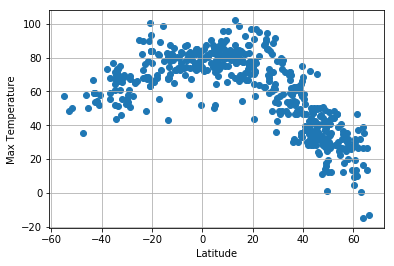

In [85]:
plt.scatter(df["Latitude"], df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.show()

# Latitude vs. Humidity Plot

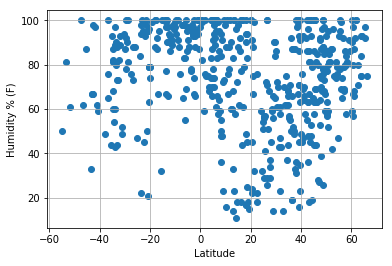

In [89]:
plt.scatter(df["Latitude"], df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity % (F)")
plt.grid(True)
plt.show()

# Latitude Vs Temperature Plot

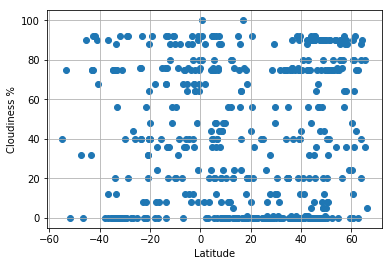

In [90]:
plt.scatter(df["Latitude"], df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

# Latitude Vs Wind Speed Plot

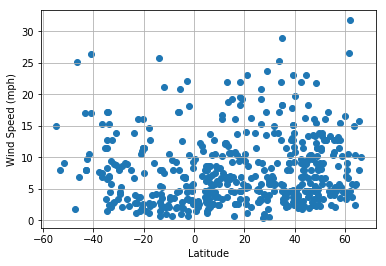

In [91]:
plt.scatter(df["Latitude"], df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()